# Visualizing data

In [38]:
!pip install split-folders

Defaulting to user installation because normal site-packages is not writeable


In [9]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import random as r
import splitfolders
import matplotlib.image as mpimg
import matplotlib.colors as clr

In [47]:
# A class for loading a image dataset and understanding its class distribution
# and image samples across classes.
class MalwareImages:
    # Initialize the dataset loader with the dataset path.
    def __init__(self, DATA_DIR : str, n, m : int):
        self.DATA_DIR = DATA_DIR
        self.class_distribution = dict()
        self.ROWS = n
        self.COLS = m
    
    # Computation of the class distribution of the dataset.
    def __compute_class_distribution(self):
        for malware_type in os.listdir(self.DATA_DIR):
            malware_img_dir = os.path.join(self.DATA_DIR, malware_type)
            self.class_distribution[malware_type] = len(os.listdir(malware_img_dir))
    
    # Plotting the class distribution.
    def plot_class_distribution(self):
        self.__compute_class_distribution()

        malware_classes = list(self.class_distribution.keys())
        malware_class_frequency = list(self.class_distribution.values())
        color_palette = sns.color_palette("pastel")
        plt.figure(figsize=(8,8))
        sns.barplot(y = malware_classes,
                    x = malware_class_frequency,
                    palette = color_palette,
                    edgecolor = "black",
                    orient='h')
        plt.title("Malware Class Distribution")
        plt.xlabel("Malware Class Frequency")
        plt.ylabel("Malware Type")
    
    # Insights into samples of different malware images across different classes.
    def malware_samples(self):
        c = 0
        fig, axs = plt.subplots(self.ROWS, self.COLS,figsize=(15,15))

        for malware_type in os.listdir(self.DATA_DIR):
            malware_img_dir = os.path.join(self.DATA_DIR, 
                                           malware_type)
            malware_img_sample = r.choice(list(os.listdir(malware_img_dir)))
            malware_img_sample_path = os.path.join(malware_img_dir, 
                                                   malware_img_sample)
            image = mpimg.imread(malware_img_sample_path)
            axs[c//self.COLS, c%self.COLS].imshow(image, 
                                                  cmap = "gray")
            axs[c//self.COLS, c%self.COLS].set_title(malware_type)
            c += 1
            
        fig.suptitle("Sample for Malware types")
        plt.subplots_adjust(wspace=0.9)
        plt.show()

In [51]:
malevis_train = MalwareImages('./malevis_train_val_300x300/train/', 5, 6)

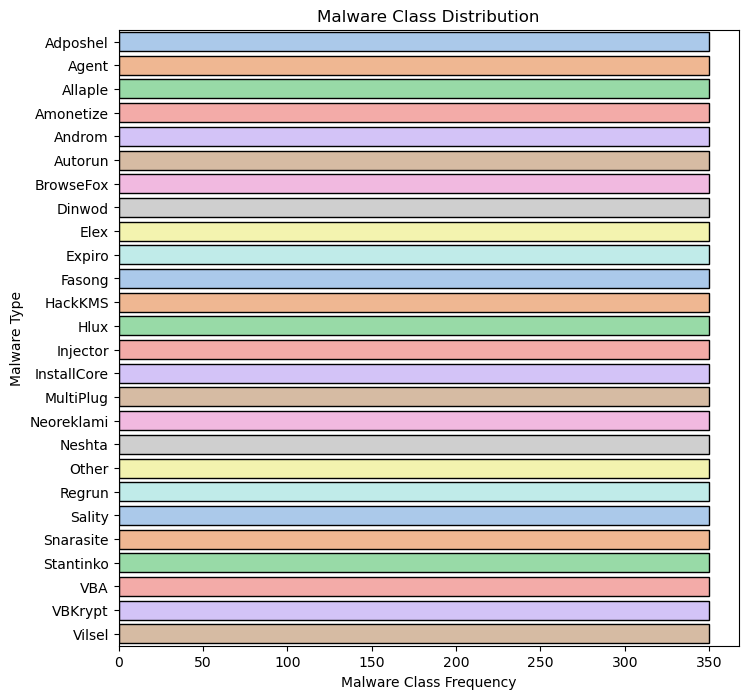

In [53]:
malevis_train.plot_class_distribution()

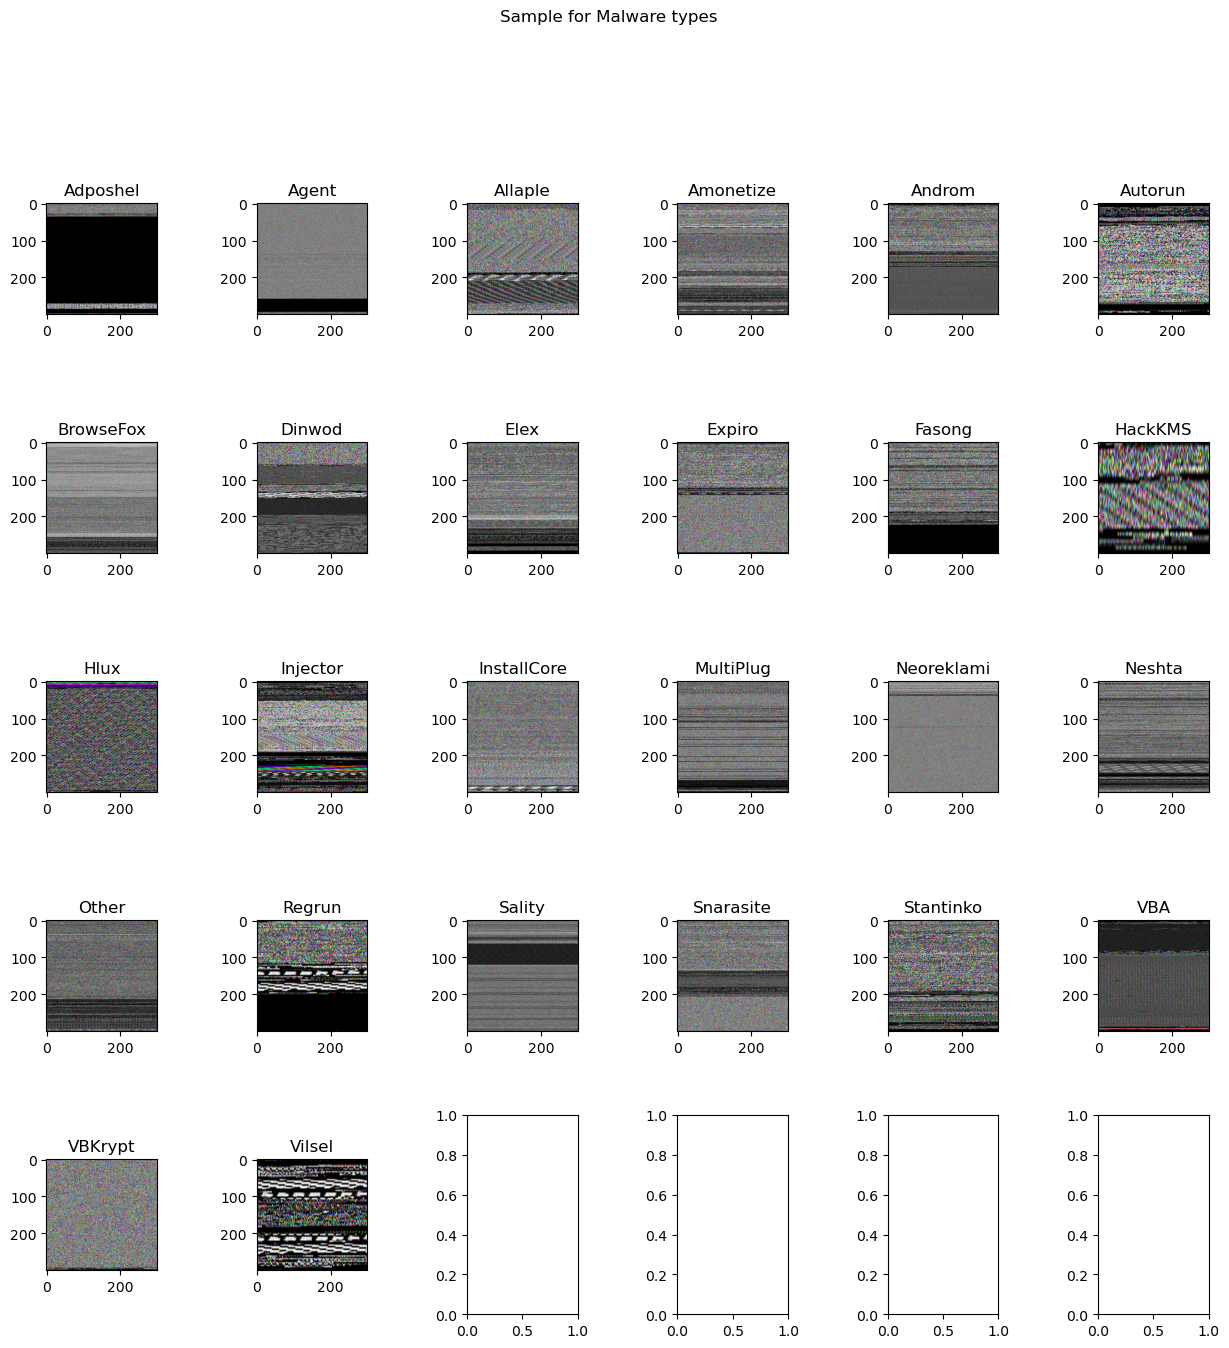

In [54]:
malevis_train.malware_samples()

In [57]:
malevis_val = MalwareImages('./malevis_train_val_300x300/val/', 5, 6)

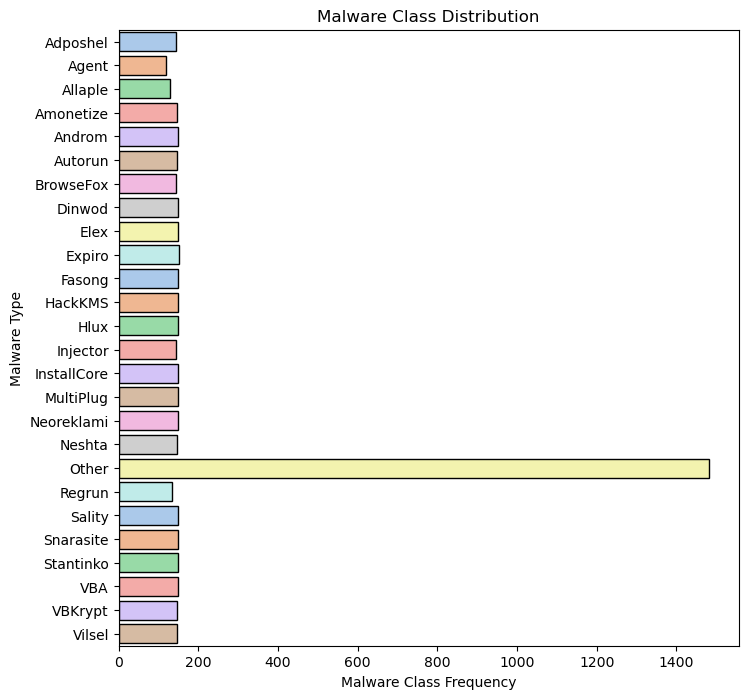

In [58]:
malevis_val.plot_class_distribution()

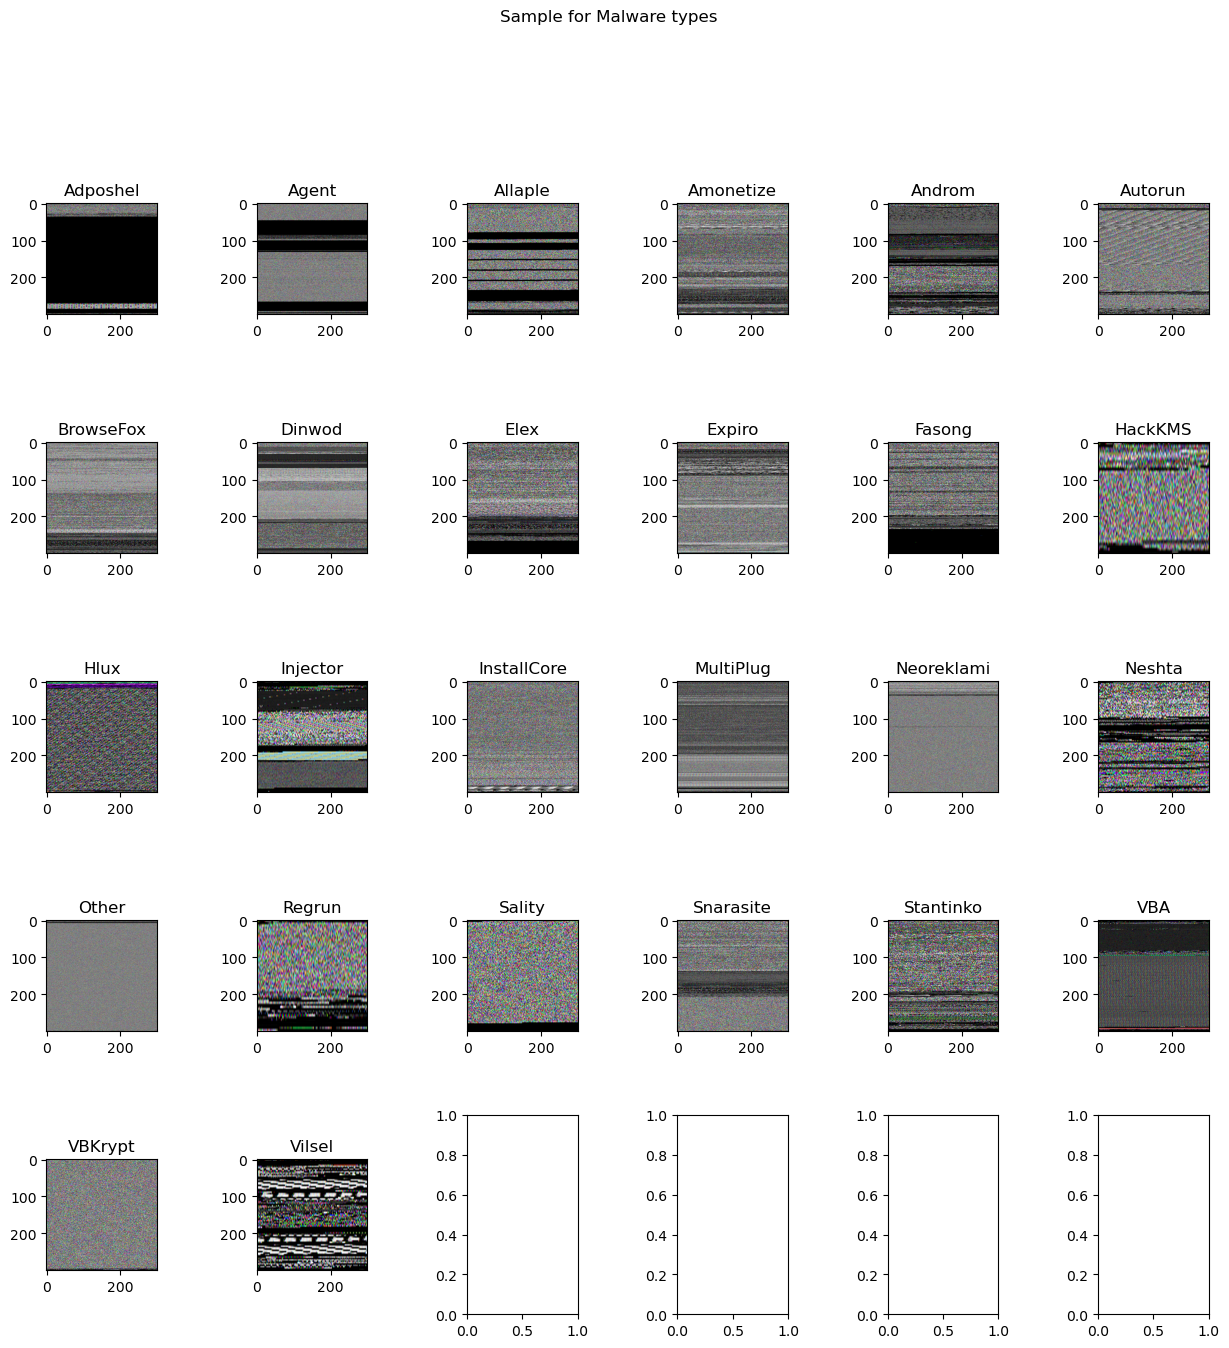

In [59]:
malevis_val.malware_samples()

# Preprocessing data

In [1]:
from keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory='./malevis_train_val_300x300/train/', target_size=(64,64), batch_size=10000)
batches.class_indices

Found 9100 images belonging to 26 classes.


{'Adposhel': 0,
 'Agent': 1,
 'Allaple': 2,
 'Amonetize': 3,
 'Androm': 4,
 'Autorun': 5,
 'BrowseFox': 6,
 'Dinwod': 7,
 'Elex': 8,
 'Expiro': 9,
 'Fasong': 10,
 'HackKMS': 11,
 'Hlux': 12,
 'Injector': 13,
 'InstallCore': 14,
 'MultiPlug': 15,
 'Neoreklami': 16,
 'Neshta': 17,
 'Other': 18,
 'Regrun': 19,
 'Sality': 20,
 'Snarasite': 21,
 'Stantinko': 22,
 'VBA': 23,
 'VBKrypt': 24,
 'Vilsel': 25}

In [2]:
imgs, labels = next(batches)

In [3]:
imgs.shape, labels.shape

((9100, 64, 64, 3), (9100, 26))

In [4]:
import numpy as np

In [5]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

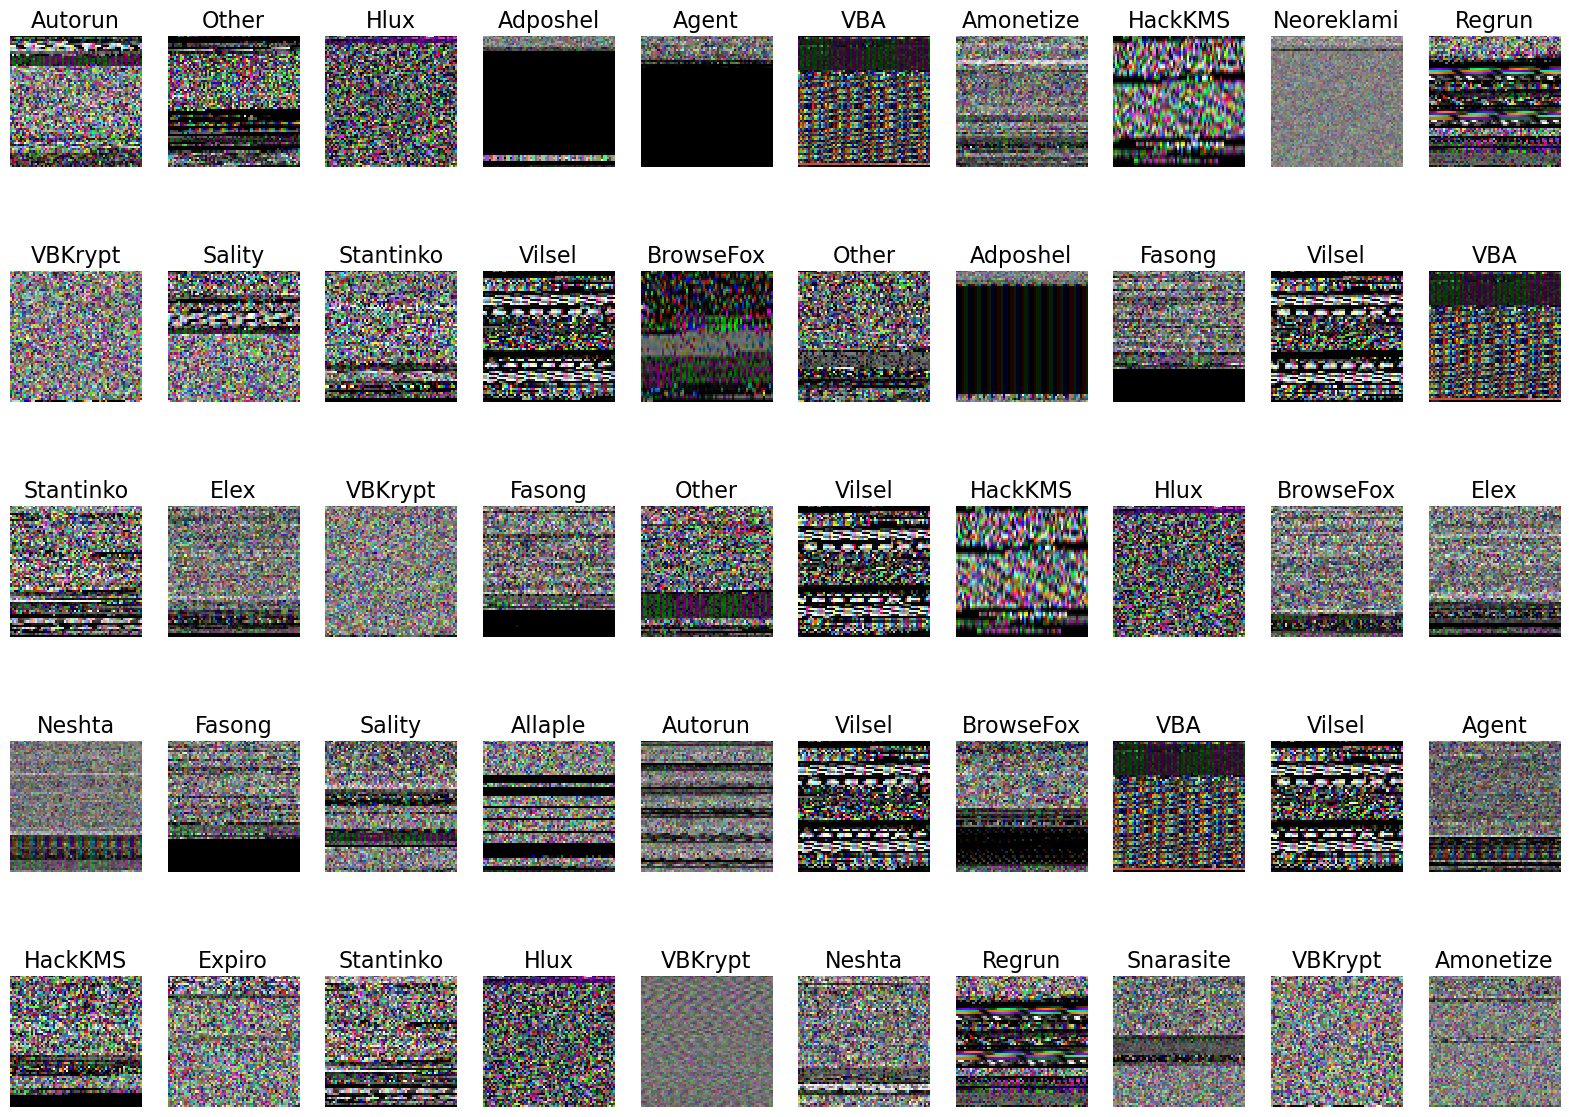

In [10]:
plots(imgs, titles = labels)

In [11]:
batches_val = ImageDataGenerator().flow_from_directory(directory='./malevis_train_val_300x300/val/', target_size=(64,64), batch_size=10000)
batches_val.class_indices


Found 5126 images belonging to 26 classes.


{'Adposhel': 0,
 'Agent': 1,
 'Allaple': 2,
 'Amonetize': 3,
 'Androm': 4,
 'Autorun': 5,
 'BrowseFox': 6,
 'Dinwod': 7,
 'Elex': 8,
 'Expiro': 9,
 'Fasong': 10,
 'HackKMS': 11,
 'Hlux': 12,
 'Injector': 13,
 'InstallCore': 14,
 'MultiPlug': 15,
 'Neoreklami': 16,
 'Neshta': 17,
 'Other': 18,
 'Regrun': 19,
 'Sality': 20,
 'Snarasite': 21,
 'Stantinko': 22,
 'VBA': 23,
 'VBKrypt': 24,
 'Vilsel': 25}

In [12]:
imgs_val, labels_val = next(batches_val)

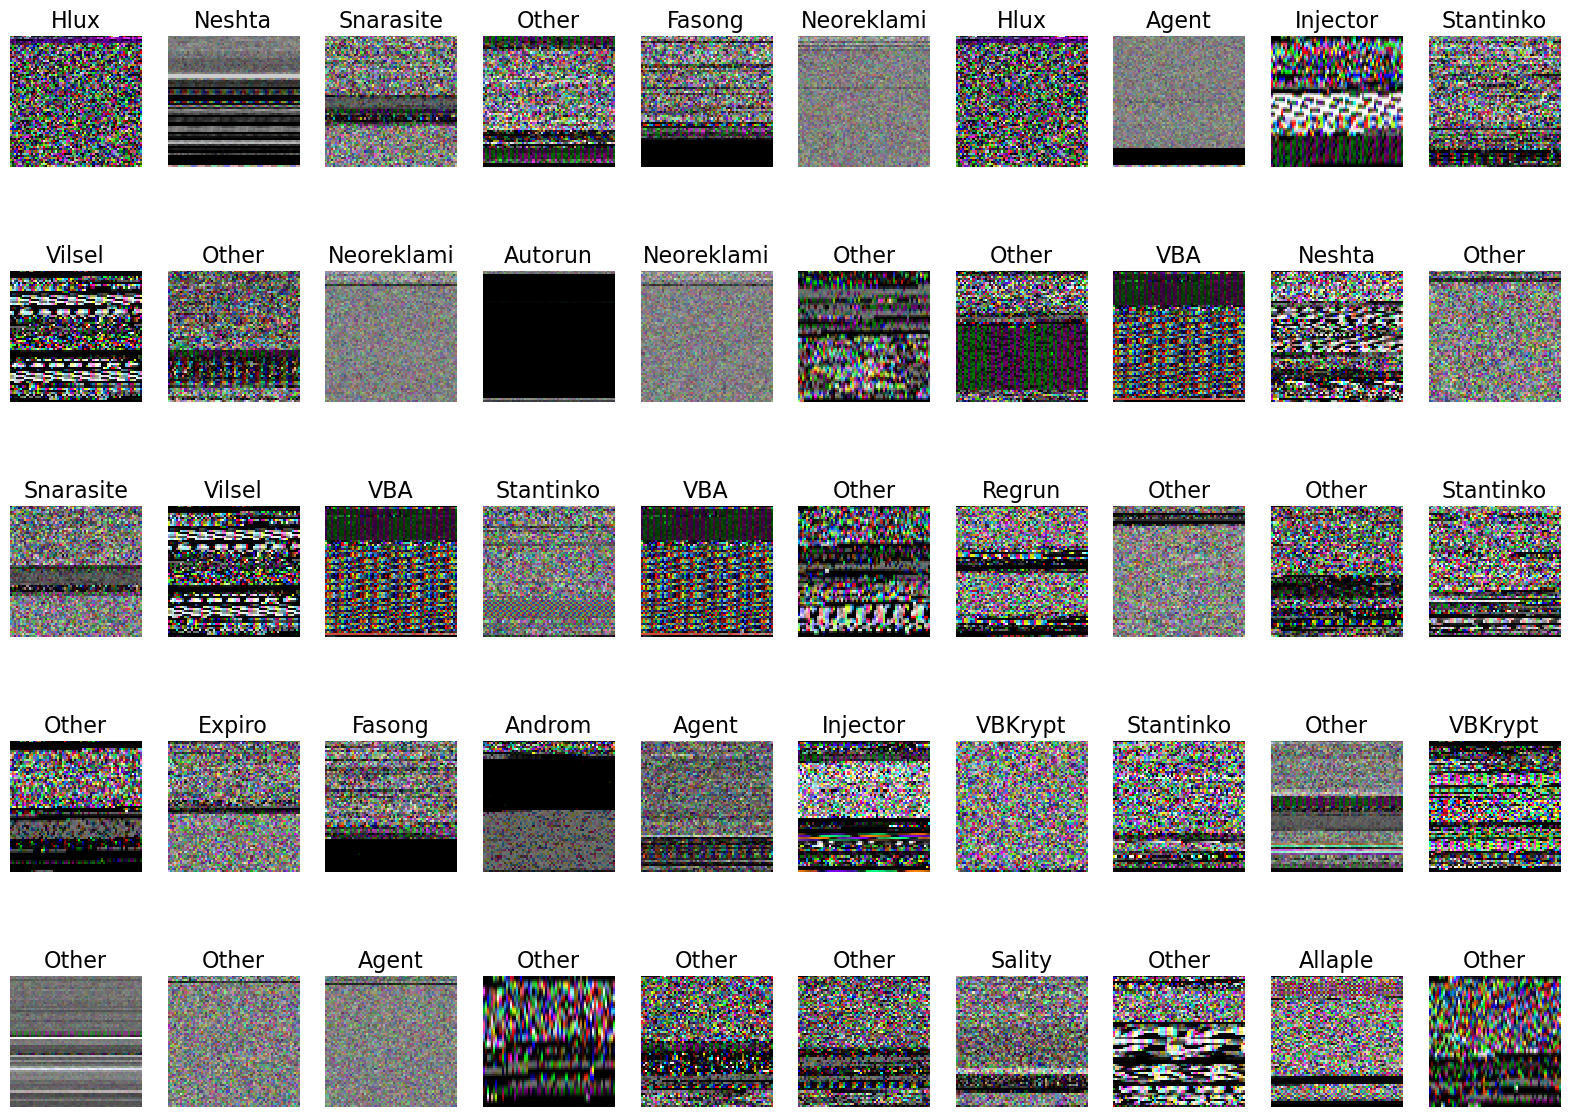

In [13]:
plots(imgs_val, titles = labels_val)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

# Defining Resnet50 model

In [15]:
import keras
from keras.layers import Dense
from keras.models import Model
from keras.applications import ResNet50

In [16]:
num_classes = 26 # number of classes in your own dataset

# define the ResNet50 architecture
resnet_model = ResNet50(include_top=False, weights=None, input_shape=(64, 64, 3))

In [17]:
# add new classification layers
x = resnet_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)


In [18]:
# create a new model with modified architecture
model = Model(inputs=resnet_model.input, outputs=predictions)

In [19]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 16, 16, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 16, 16, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 16, 16, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv2_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 8, 8, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 8, 8, 512)    66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv3_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 4, 4, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 4, 4, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 4, 4, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, 4, 4, 1024)  4096        ['conv4_block2_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 4, 4, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 4, 4, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 4, 4, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 2, 2, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 2, 2, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 2, 2, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_blo

# Training Resnet50 model

In [ ]:
# train the model
history = model.fit(X_train, y_train, validation_data=(imgs_val, labels_val), epochs=10)


Epoch 1/10
200/200 [==============================] - 489s 2s/step - loss: 0.8563 - accuracy: 0.7622 - val_loss: 35560.2891 - val_accuracy: 0.0285
Epoch 2/10
200/200 [==============================] - 493s 2s/step - loss: 0.7741 - accuracy: 0.7881 - val_loss: 11957.1924 - val_accuracy: 0.0281
Epoch 3/10
200/200 [==============================] - 526s 3s/step - loss: 0.6189 - accuracy: 0.8265 - val_loss: 9550.6875 - val_accuracy: 0.0281
Epoch 4/10
179/200 [=========================>....] - ETA: 52s - loss: 0.4970 - accuracy: 0.8547

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
# y_pred = Malware_model.predict_classes(X_test, verbose=0)
predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

86/86 [==============================] - 21s 231ms/step


In [111]:
y_pred[:100], np.argmax(y_test,axis=1)[:100]

(array([25, 25, 25, 25, 13, 17, 25,  4,  4,  0, 25, 17, 25, 25, 25, 25, 18,
        17, 25, 25, 25, 21,  4, 25, 25, 17, 25, 25, 25, 25, 17, 25, 25, 17,
        25, 13, 25,  4,  4,  4, 17, 13, 25, 21, 13, 13, 17, 25,  4, 25,  4,
        25, 17,  4, 17, 13,  9, 25, 25,  4, 17, 25,  4, 17, 17, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 17, 25, 17, 25, 25,  4, 25, 17, 13, 25, 17,
         4, 25, 25, 25, 25, 25, 13, 25, 25, 25, 13, 21, 25, 17, 13],
       dtype=int64),
 array([19, 23, 25, 18, 11, 20,  0, 22,  8,  4, 22, 14, 20,  8, 13, 13,  0,
        14,  2, 11, 12, 21,  5, 12, 10, 16, 11, 12, 18,  5,  9,  4,  8,  2,
         4, 16, 19,  9, 15,  7, 16, 20, 10, 21,  9, 11, 21, 24, 13, 10, 22,
        20, 15, 15, 14,  2, 15, 24, 10,  5, 18, 25,  9, 24, 17, 13,  2,  2,
        23, 13,  4, 12, 25,  2, 14, 15, 21,  7, 12,  5, 19, 16, 11, 18, 24,
         9, 19, 12,  4, 25, 25, 11, 13, 20, 23, 16, 21, 10,  3,  3],
       dtype=int64))

# Validating Resnet50 model

In [101]:
y_test2 = np.argmax(y_test, axis=1)

In [102]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test2, y_pred)

In [103]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

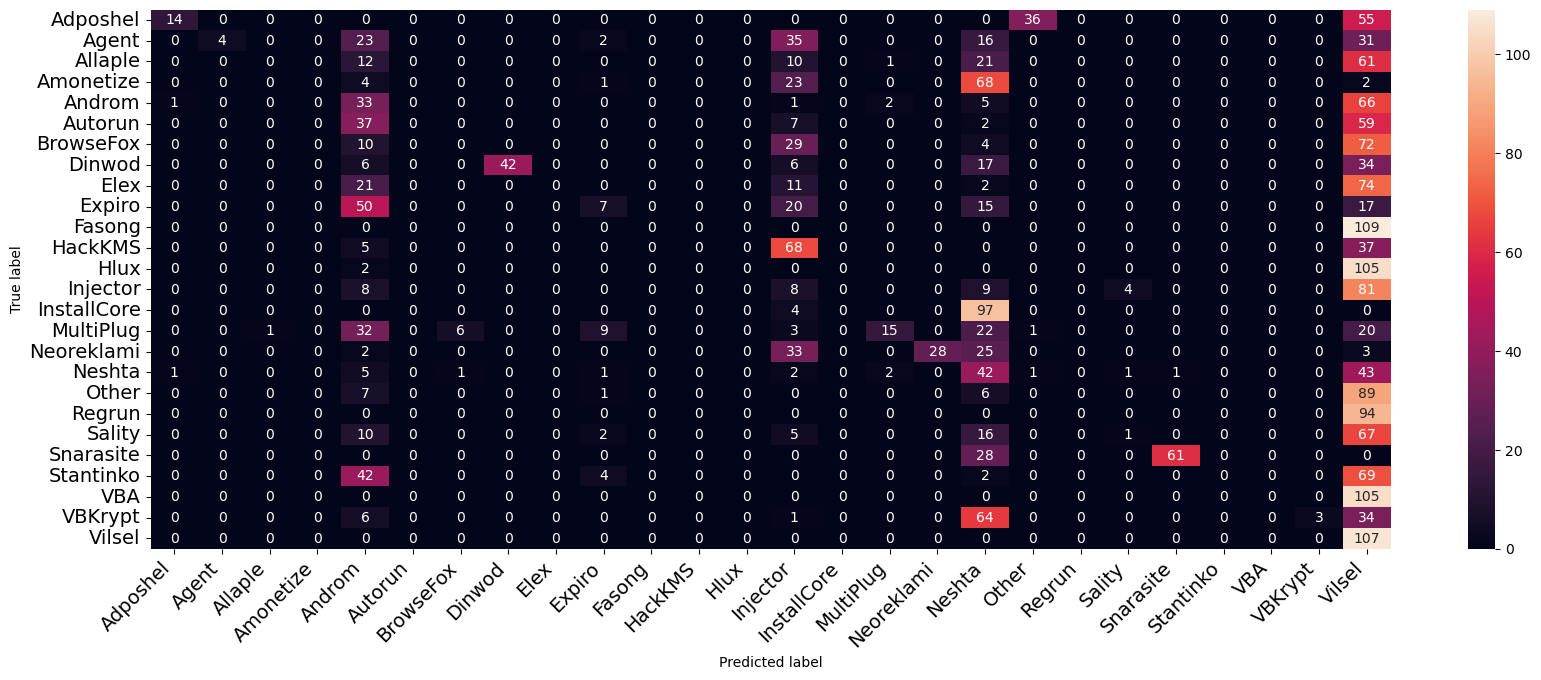

In [104]:
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)

# Define Xception model

In [129]:
num_classes = 26
xception_net = Xception(include_top=False, input_shape=(72, 72, 3))
for layer in xception_net.layers:
    layer.trainable = False

xception = Sequential()
xception.add(xception_net)
xception.add(tf.keras.layers.GlobalAveragePooling2D())
xception.add(Dense(512, activation='relu'))
xception.add(Dense(512, activation='relu'))
xception.add(Dense(num_classes, activation='softmax'))
xception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [130]:
xception.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 global_average_pooling2d_7   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_16 (Dense)            (None, 512)               1049088   
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 dense_18 (Dense)            (None, 26)                13338     
                                                                 
Total params: 22,186,562
Trainable params: 1,325,082
Non-trainable params: 20,861,480
__________________________________

In [131]:
xception.fit(X_train, y_train, validation_data=(imgs_val, labels_val), epochs=10)

Epoch 1/10
200/200 [==============================] - ETA: 0s - loss: 1.0987 - accuracy: 0.7229

ValueError: in user code:

    File "C:\Users\DUONG\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\DUONG\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DUONG\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\DUONG\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1788, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\DUONG\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\DUONG\AppData\Roaming\Python\Python310\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 128, 128, 3), found shape=(None, 64, 64, 3)
